### Mengonversi DataFrame Pandas Menjadi GeoDataFrame


In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Membuat DataFrame Pandas
data = {
    'city': ['Jakarta', 'Bandung', 'Surabaya'],
    'latitude': [-6.2088, -6.9175, -7.2504],
    'longitude': [106.8456, 107.6191, 112.7688]
}
df = pd.DataFrame(data)

# Membuat kolom 'geometry' dengan titik geometri
df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Mengonversi DataFrame menjadi GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Menetapkan CRS (Coordinate Reference System) sebagai WGS84
gdf.set_crs(epsg=4326, inplace=True)

gdf.head()

,city,latitude,longitude,geometry
0,Jakarta,-6.2088,106.8456,POINT (106.8456 -6.2088)
1,Bandung,-6.9175,107.6191,POINT (107.6191 -6.9175)
2,Surabaya,-7.2504,112.7688,POINT (112.7688 -7.2504)


### Mengonversi GeoDataFrame Menjadi DataFrame Pandas

In [3]:
# Mengonversi GeoDataFrame menjadi DataFrame Pandas dengan menghapus kolom 'geometry'
df_pandas = gdf.drop(columns='geometry')
df_pandas.head()

,city,latitude,longitude
0,Jakarta,-6.2088,106.8456
1,Bandung,-6.9175,107.6191
2,Surabaya,-7.2504,112.7688


### Menggabungkan Data (Join/Merge) antara GeoDataFrame dan DataFrame


In [4]:
# Membuat GeoDataFrame berisi data geospatial kota
gdf_cities = gpd.GeoDataFrame({
    'city': ['Jakarta', 'Bandung', 'Surabaya'],
    'geometry': [Point(106.8456, -6.2088), Point(107.6191, -6.9175), Point(112.7688, -7.2504)]
}, crs="EPSG:4326")

# Membuat DataFrame Pandas berisi data populasi
df_population = pd.DataFrame({
    'city': ['Jakarta', 'Bandung', 'Surabaya'],
    'population': [10770487, 2394876, 2985258]
})

# Menggabungkan GeoDataFrame dan DataFrame berdasarkan kolom 'city'
gdf_combined = gdf_cities.merge(df_population, on='city')
gdf_combined.head()

,city,geometry,population
0,Jakarta,POINT (106.8456 -6.2088),10770487
1,Bandung,POINT (107.6191 -6.9175),2394876
2,Surabaya,POINT (112.7688 -7.2504),2985258


### Analisis Data dan Statistik dengan GeoPandas dan Pandas

In [6]:
# Membuat GeoDataFrame untuk contoh analisis
gdf_districts = gpd.GeoDataFrame({
    'province': ['Jawa Barat', 'Jawa Barat', 'Jawa Timur'],
    'district': ['Bandung', 'Bogor', 'Surabaya'],
    'population': [2394876, 1045735, 2985258],
    'geometry': [Point(107.6191, -6.9175), Point(106.8074, -6.5962), Point(112.7688, -7.2504)]
}, crs="EPSG:4326")

# Mengelompokkan data berdasarkan provinsi dan menghitung total populasi
population_by_province = gdf_districts.groupby('province')['population'].sum().reset_index()
population_by_province.head()

,province,population
0,Jawa Barat,3440611
1,Jawa Timur,2985258


### Visualisasi Data dengan GeoPandas dan Pandas

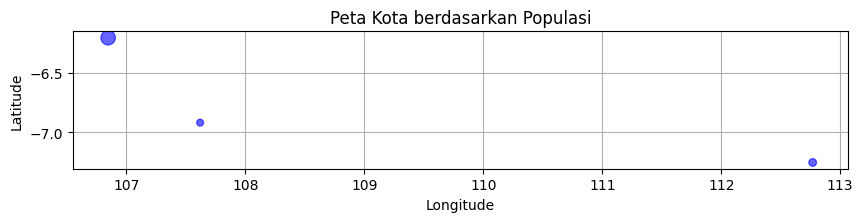

In [7]:
import matplotlib.pyplot as plt

# Menggabungkan data kota dengan data populasi
gdf_cities = gdf_cities.merge(df_population, on='city')

# Membuat peta dengan ukuran titik berdasarkan populasi
ax = gdf_cities.plot(figsize=(10, 6), marker='o', color='blue', markersize=gdf_cities['population'] / 100000, alpha=0.6, legend=True)

plt.title("Peta Kota berdasarkan Populasi")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()